## Load data

In [15]:
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

# Load data
data = pd.read_csv('/content/drive/MyDrive/dataminassi/assignment5/housing.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedianIncome      20640 non-null  float64
 1   HouseAge          20640 non-null  int64  
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  int64  
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [6]:
data.head()

,MedianIncome,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedianIncome,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedianHouseValue,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


## Scale features

In [8]:
features = ['Longitude', 'Latitude', 'MedianIncome']
select_df = data[features]
select_df.columns

Index(['Longitude', 'Latitude', 'MedianIncome'], dtype='object')

In [9]:
# Scale the features
X = StandardScaler().fit_transform(select_df)
X[:5]

array([[-1.32783522,  1.05254828,  2.34476576],
       [-1.32284391,  1.04318455,  2.33223796],
       [-1.33282653,  1.03850269,  1.7826994 ],
       [-1.33781784,  1.03850269,  0.93296751],
       [-1.33781784,  1.03850269, -0.012881  ]])

## Training the model

In [10]:
kmeans = KMeans(n_clusters=6) # number of clusters must be specified
model = kmeans.fit(X)
model

KMeans(n_clusters=6)

In [12]:
centers = model.cluster_centers_
centers[:5]

array([[ 0.87233178, -0.84960631, -0.55895004],
       [-1.16144113,  1.27271592, -0.55559484],
       [ 0.77059138, -0.82789555,  0.77855654],
       [ 0.16394975, -0.33934538,  3.51696065],
       [-1.19015284,  0.97381237,  0.85202462]])

In [13]:
centers.shape

(6, 3)

In [18]:
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')
	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [19]:
# Function that creates Parallel Plots
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [20]:
P = pd_centers(features, centers)

In [21]:
# Returns the six clusters and their corresponding values for the centroids
P

,Longitude,Latitude,MedianIncome,prediction
0,0.872332,-0.849606,-0.558950,0
1,-1.161441,1.272716,-0.555595,1
2,0.770591,-0.827896,0.778557,2
3,0.163950,-0.339345,3.516961,3
4,-1.190153,0.973812,0.852025,4
5,-0.080120,0.229243,-0.656650,5


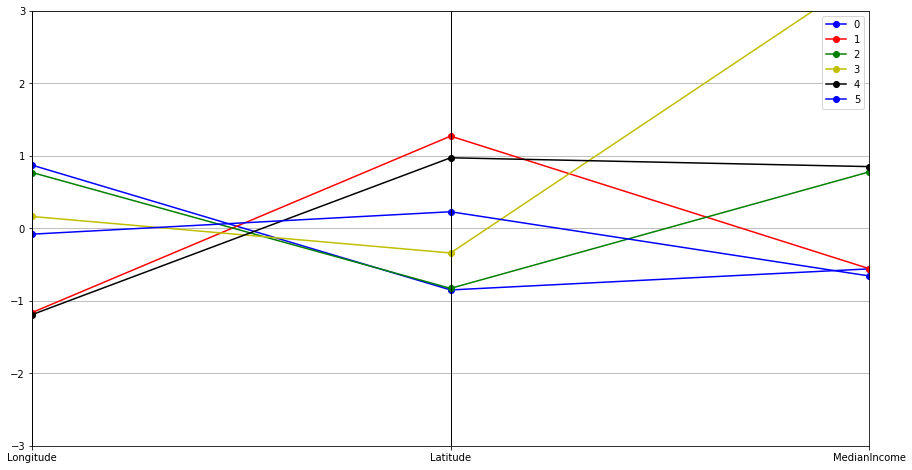

In [22]:
# Shows how different each cluster is across all features
parallel_plot(P)

In [23]:
# Create cluster label
data['econ_region'] = kmeans.fit_predict(X)
data['econ_region'] = data['econ_region'].astype("category")
data.head()

,MedianIncome,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue,econ_region
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526,4
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585,4
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521,4
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413,4
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422,1


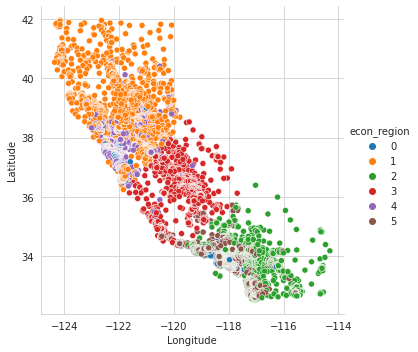

In [25]:
sns.set_style('whitegrid')
sns.relplot(x='Longitude', y='Latitude', hue='econ_region', data=data, kind='scatter');

In [26]:
median_attributes = ['econ_region', 'MedianHouseValue', 'MedianIncome', 'HouseAge']
income_house = data[median_attributes]
income_house.groupby(['econ_region']).describe()

MedianHouseValue                                                 \
                       count      mean       std      min      25%      50%   
econ_region                                                                   
0                      562.0  4.651114  0.695713  1.12500  4.60400  5.00001   
1                     4866.0  1.567531  0.870582  0.14999  0.94300  1.34400   
2                     6609.0  1.726068  0.815048  0.14999  1.17500  1.58500   
3                     1658.0  1.050068  0.690027  0.26600  0.61525  0.81600   
4                     2777.0  2.861824  1.035408  0.67500  2.07200  2.69900   
5                     4168.0  2.724960  1.023063  0.14999  1.94575  2.47000   

                              MedianIncome             ...             \
                 75%      max        count       mean  ...        75%   
econ_region                                            ...              
0            5.00001  5.00001        562.0  10.466143  ...  11.239350   
1            1.93200  5.00001       4866.0   2.822611  ...   3.491325   
2            2.02100  5.00001       6609.0   2.796845  ...   3.437500   
3            1.18050  5.00001       1658.0   2.621392  ...   3.210475   
4            3.52100  5.00001       2777.0   5.504603  ...   6.110400   
5            3.34100  5.00001       4168.0   5.315968  ...   5.965150   

                     HouseAge                                               \
                 max    count       mean        std  min   25%   50%   75%   
econ_region                                                                  
0            15.0001    562.0  27.562278  13.905610  2.0  17.0  26.0  37.0   
1             4.5590   4866.0  30.656186  13.447212  2.0  19.0  30.0  42.0   
2             4.1458   6609.0  30.002421  11.614872  1.0  21.0  31.0  38.0   
3             5.0100   1658.0  25.582630  11.139408  2.0  17.0  25.0  34.0   
4             9.5551   2777.0  27.110551  13.193651  1.0  17.0  26.0  36.0   
5             8.2531   4168.0  26.503839  12.265873  1.0  16.0  27.0  35.0   

                   
              max  
econ_region        
0            52.0  
1            52.0  
2            52.0  
3            52.0  
4            52.0  
5            52.0  

[6 rows x 24 columns]

## Summary

* There appears to be some disparity between the economic zones indicated by the k-means algorithm in terms of median house value and median income.